In [59]:
#导入第三方库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data1=pd.read_csv(r'D:\StudyTools\code\Python_CODE\sam_mum_baby.csv')
data1

,user_id,birthday,gender
0,2757,20130311,1
1,415971,20121111,0
2,1372572,20120130,1
3,10339332,20110910,0
4,10642245,20130213,0
...,...,...,...
948,2020957900,20140430,0
949,2080304899,20100713,0
950,2114469016,20140416,0
951,2186831536,20140519,1


In [5]:
data2=pd.read_csv(r'D:\StudyTools\code\Python_CODE\mum_baby_trade_history.csv')
data2

,user_id,auction_id,cat_id,cat1,property,buy_mount,day
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,20140919
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,20131011
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,20131011
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,20141023
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,20141103
...,...,...,...,...,...,...,...
29966,57747284,35169635909,50010549,50008168,21458:125202070;22019:3228688;22019:3248884;22...,1,20140109
29967,287541325,19778523000,50007011,50008168,21458:112788583;1633959:3523439;3130834:209537...,2,20140109
29968,82915321,12766532512,50011993,28,21475:137325;1628665:3233937;1628665:29798;162...,1,20131008
29969,78259523,18309305134,50013711,50008168,21458:30992;1628665:29778;1628665:29793;163395...,1,20131008


In [10]:
# 数据读取
file_path1 =r"./cleaned_data_tarde.csv"
file_path2 =r"./cleaned_data_baby.csv"
df_left=pd.read_csv(file_path1)
df_right=pd.read_csv(file_path2)

In [11]:
# 表按用户ID连接
df = pd.merge(df_left,df_right)
df.columns=['用户ID','订单编号','商品ID','根类别ID','购买数量','时间戳','孩子出生日期','孩子性别']
df['时间戳']=pd.to_datetime(df['时间戳'].astype(str))
df['孩子出生日期']=pd.to_datetime(df['孩子出生日期'].astype(str))
df['孩子年龄']=round((df['时间戳']-df['孩子出生日期'])/pd.Timedelta(days=365),2)

In [12]:
# 一、数据清洗
# 去掉未知孩子性别的数据
df=df[df['孩子性别']!='未知']

#去掉孩子出生日期晚于购买时间的数据
df=df[df['孩子年龄']>=0]
df

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳,孩子出生日期,孩子性别,孩子年龄
0,513441334,19909384116,50010557,50008168,1,2012-12-12,2011-01-05,男,1.94
1,377550424,15771663914,50015841,28,1,2012-11-23,2011-06-20,男,1.43
2,47342027,14066344263,50013636,50008168,1,2012-09-11,2010-10-08,男,1.93
3,119784861,20796936076,50140021,50008168,1,2012-11-29,2012-03-27,女,0.68
4,159129426,15198386301,50013711,50008168,2,2012-08-08,2010-08-25,女,1.96
...,...,...,...,...,...,...,...,...,...
950,685332320,12781785338,50018831,50014815,2,2013-06-01,2012-02-23,女,1.27
951,389326420,17164967407,50006820,28,1,2014-09-16,2013-07-17,女,1.17
952,359840716,17513925908,50013207,50008168,1,2013-03-18,2009-01-20,女,4.16
953,1372572,16915013171,50008845,28,1,2013-03-27,2012-01-30,男,1.16


In [13]:
file_path =r"./cleaned_data_tarde.csv"
df1=pd.read_csv(file_path)
df1

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳
0,786295544,41098319944,50014866,50022520,2,2014-09-19
1,532110457,17916191097,50011993,28,1,2013-10-11
2,249013725,21896936223,50012461,50014815,1,2013-10-11
3,917056007,12515996043,50018831,50014815,2,2014-10-23
4,444069173,20487688075,50013636,50008168,1,2014-11-03
...,...,...,...,...,...,...
29962,57747284,35169635909,50010549,50008168,1,2014-01-09
29963,287541325,19778523000,50007011,50008168,2,2014-01-09
29964,82915321,12766532512,50011993,28,1,2013-10-08
29965,78259523,18309305134,50013711,50008168,1,2013-10-08


In [14]:
describe1=pd.DataFrame({"用户数量":len(set(list(df1["用户ID"]))),"商品数量":len(set(list(df1["商品ID"]))),"根类别数量":len(set(list(df1["根类别ID"])))},index=['1'])
describe1

,用户数量,商品数量,根类别数量
1,29940,662,6


In [15]:
# 时间戳拆分与季度划分
df1.loc[:,'年']=df1['时间戳'].apply(lambda x:x.split('-')[0])
df1.loc[:,'月']=df1['时间戳'].apply(lambda x:x.split('-')[1])
df1.loc[:,'日']=df1['时间戳'].apply(lambda x:x.split('-')[2])
df1.loc[:,'季度']=df1['月'].apply(lambda x:int(x)//3+(int(x)%3!=0))
df1

,用户ID,订单编号,商品ID,根类别ID,购买数量,时间戳,年,月,日,季度
0,786295544,41098319944,50014866,50022520,2,2014-09-19,2014,09,19,3
1,532110457,17916191097,50011993,28,1,2013-10-11,2013,10,11,4
2,249013725,21896936223,50012461,50014815,1,2013-10-11,2013,10,11,4
3,917056007,12515996043,50018831,50014815,2,2014-10-23,2014,10,23,4
4,444069173,20487688075,50013636,50008168,1,2014-11-03,2014,11,03,4
...,...,...,...,...,...,...,...,...,...,...
29962,57747284,35169635909,50010549,50008168,1,2014-01-09,2014,01,09,1
29963,287541325,19778523000,50007011,50008168,2,2014-01-09,2014,01,09,1
29964,82915321,12766532512,50011993,28,1,2013-10-08,2013,10,08,4
29965,78259523,18309305134,50013711,50008168,1,2013-10-08,2013,10,08,4


In [16]:
#筛选2013、2014年订单
m_sales_2013=df1[df1['年']=='2013']
m_sales_2014=df1[df1['年']=='2014']

#2013年按月统计
a=m_sales_2013.groupby("月")["订单编号"].count()
b=m_sales_2013.groupby("月")["用户ID"].count()
c=m_sales_2013.groupby("月")["购买数量"].sum()
# a
m_2013_sales= pd.DataFrame()
m_2013_sales['订单量']=a
m_2013_sales['购买人数']=b
m_2013_sales['销售量']=c 
m_2013_sales

,订单量,购买人数,销售量
月,,,
01,629,629,1372
02,318,318,1177
03,738,738,1094
04,769,769,1506
05,985,985,1864
06,679,679,1232
07,678,678,2662
08,745,745,1364
09,967,967,1956


In [17]:
#2014年按月统计
a=m_sales_2014.groupby("月")["订单编号"].count()
b=m_sales_2014.groupby("月")["用户ID"].count()
c=m_sales_2014.groupby("月")["购买数量"].sum()
# a
m_2014_sales= pd.DataFrame()
m_2014_sales['订单量']=a
m_2014_sales['购买人数']=b
m_2014_sales['销售量']=c 
m_2014_sales

,订单量,购买人数,销售量
月,,,
01,763,763,1109
02,702,702,1458
03,1240,1240,2359
04,1243,1243,2204
05,1452,1452,3669
06,1088,1088,1785
07,1062,1062,2461
08,1206,1206,3139
09,1403,1403,2437


Text(0, 0.5, '购买数量（万件）')

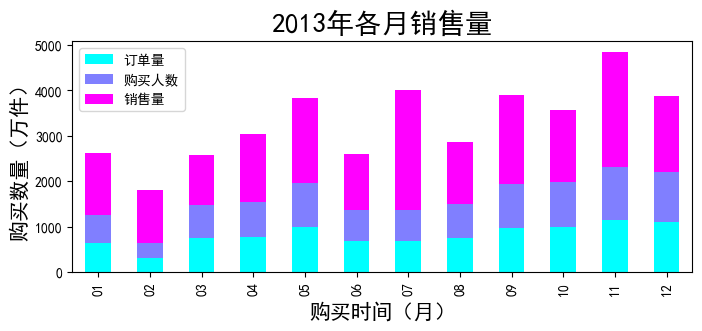

In [51]:
#2013年各月销售量
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
m_2013_sales.plot(kind='bar',colormap='cool',stacked=True,figsize=(8,3))
plt.title('2013年各月销售量', fontsize = 20)
plt.xlabel("购买时间（月）", fontsize = 15)
plt.ylabel("购买数量（万件）", fontsize = 15)

Text(0, 0.5, '购买数量（万件）')

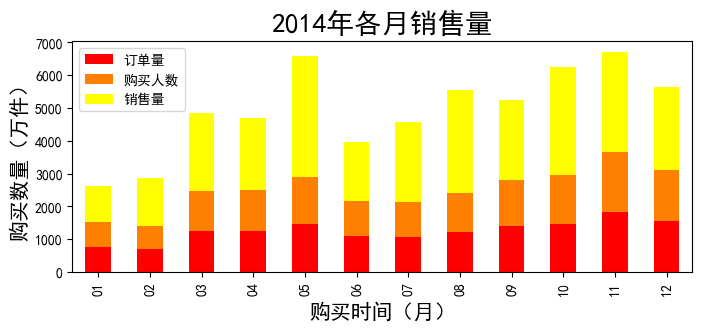

In [43]:
#2014年各月销售量
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
m_2014_sales.plot(kind='bar',grid=False,colormap='autumn',stacked=True,figsize=(8,3))
plt.title('2014年各月销售量', fontsize = 20)
plt.xlabel("购买时间（月）", fontsize = 15)
plt.ylabel("购买数量（万件）", fontsize = 15)

In [20]:
#性别分布
# df1['用户ID'].value_counts()
a=df.groupby("孩子性别")["订单编号"].count()
b=df.groupby("孩子性别")["用户ID"].count()
c=df.groupby("孩子性别")["购买数量"].sum()

sex_sales=pd.DataFrame()
sex_sales['订单量']=a
sex_sales['购买人数']=b
sex_sales['销售量']=c 
sex_sales

,订单量,购买人数,销售量
孩子性别,,,
女,426,426,817
男,367,367,449


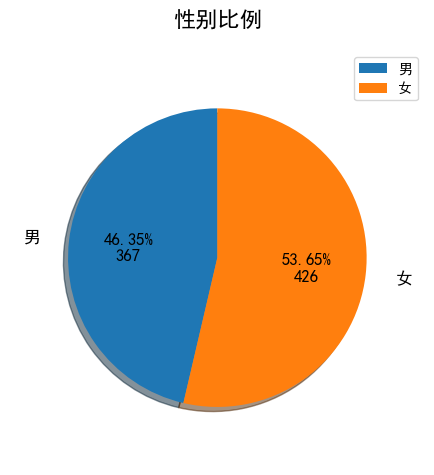

In [55]:
#性别比例
labels=['男','女']
values=np.array([368,426])
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.2,startangle=90,autopct=lambda x:func(x,values),textprops=dict(fontsize=12),radius=0.9,shadow=True)
sub.legend()
fig.suptitle('性别比例',fontsize=16)
fig.tight_layout()
plt.show()

In [22]:
# df1['用户ID'].value_counts()
a=df.groupby(["孩子性别",'根类别ID'])["订单编号"].count()
b=df.groupby(["孩子性别",'根类别ID'])["用户ID"].count()
c=df.groupby(["孩子性别",'根类别ID'])["购买数量"].sum()

sex_sales_d=pd.DataFrame()
sex_sales_d['订单量']=a
sex_sales_d['购买人数']=b
sex_sales_d['销售量']=c 
sex_sales_d

订单量  购买人数  销售量
孩子性别 根类别ID                    
女    28          86    86  137
     38          24    24  103
     50008168   195   195  217
     50014815    80    80  317
     50022520    15    15   15
     122650008   26    26   28
男    28          85    85   98
     38          18    18   41
     50008168   162   162  183
     50014815    65    65   89
     50022520    14    14   15
     122650008   23    23   23

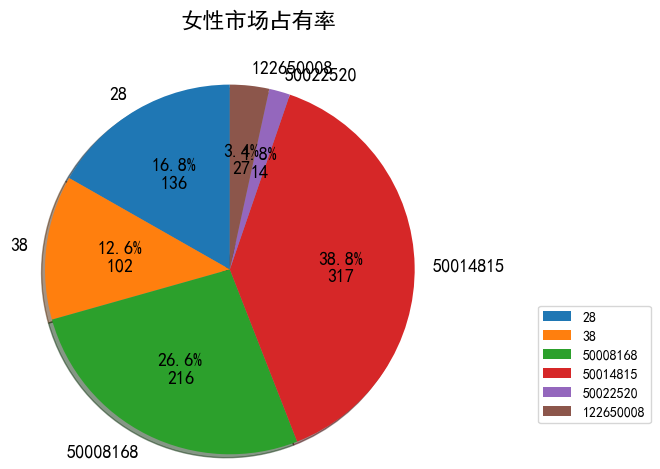

In [44]:
#女性市场占用率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
labels=['28','38','50008168','50014815','50022520','122650008']
values=np.array([137,103,217,317,15,28])
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.1f}%\n{:d}'.format(pct, absolute)
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.1,startangle=90,autopct=lambda x:func(x,values),textprops=dict(fontsize=13),radius=1.5,shadow=True)
fig.suptitle('女性市场占有率',fontsize=16)
fig.tight_layout()
sub.legend()
plt.legend(bbox_to_anchor=(1.5,0), loc=3, borderaxespad=0)
plt.show()

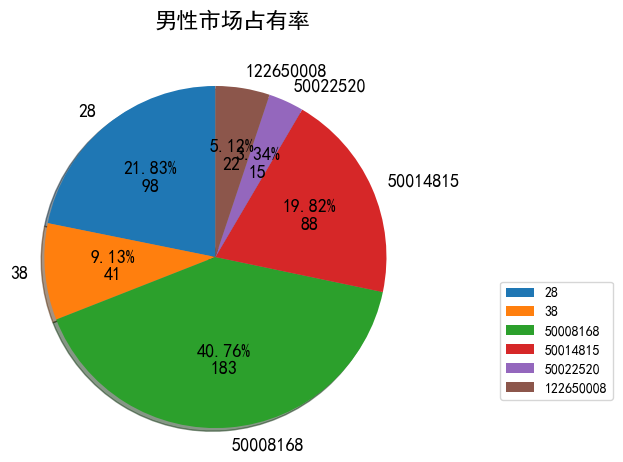

In [45]:
#男性市场占用率
labels=['28','38','50008168','50014815','50022520','122650008']
values=np.array([98,41,183,89,15,23])
def func(pct,allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values,labels=labels,labeldistance=1.1,startangle=90,autopct=lambda x:func(x,values),textprops=dict(fontsize=13),radius=1.5,shadow=True)
fig.suptitle('男性市场占有率',fontsize=16)
fig.tight_layout()
plt.legend(bbox_to_anchor=(1.5,0), loc=3, borderaxespad=0)
plt.show()